IMPORT MODULES

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import unidecode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from transformer_functions import *


### UNDERSTAND THE DATA STRUCTURE - DATA EXPLORATION

In [138]:
df=pd.read_csv('./datasets/books.csv',on_bad_lines='skip')
df['average_ratings_category']=pd.cut(df['average_rating'],bins=[-1,2,3,4,5],labels=['0','1','2','3'])
lab=LabelEncoder()
df['average_ratings_category']=lab.fit_transform(df['average_ratings_category'])
#df['average_ratings_category']=pd.to_numeric(df['average_ratings_category'])
df.rename(columns={'  num_pages':'num_pages'},inplace=True)
df.tail(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,average_ratings_category
11113,45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,9722330551,9789722330558,por,160,207,16,8/15/2003,Editorial Presença,2
11114,45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,9722329987,9789722329989,por,147,396,37,4/8/2003,Editorial Presença,3
11115,45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,9722331329,9789722331326,por,176,161,14,9/1/2004,Editorial Presença,3
11116,45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,9722330977,9789722330978,por,160,215,11,10/11/2003,Editorial Presença,2
11117,45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books,2
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,3
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,3
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,2
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,2
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros,2


In [131]:
df[df.num_pages>1000]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,average_ratings_category
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,3
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,3
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,9/25/2012,Ballantine Books,3
22,31,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.50,0618517650,9780618517657,eng,1184,1710,91,10/21/2004,Houghton Mifflin Harcourt,3
24,35,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Alan Lee,4.50,0618260587,9780618260584,en-US,1216,1618,140,10/1/2002,Houghton Mifflin Harcourt,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,42932,Whirlwind (Asian Saga #6),James Clavell,3.82,0340766182,9780340766187,eng,1231,5626,164,12/2/1999,Morrow,2
10543,42986,War and Remembrance (The Henry Family #2),Herman Wouk,4.41,0316954993,9780316954990,eng,1042,29555,680,2/5/2002,Back Bay Books,3
10749,43888,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.29,0812575601,9780812575606,en-US,2480,4196,81,11/15/1998,Tor Books,3
10906,44613,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,0701125594,9780701125592,eng,3400,6,1,3/5/1981,Chatto & Windus,3


#### CATEGORICAL FEATURES EXPLORATION

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bookID                    11123 non-null  int64  
 1   title                     11123 non-null  object 
 2   authors                   11123 non-null  object 
 3   average_rating            11123 non-null  float64
 4   isbn                      11123 non-null  object 
 5   isbn13                    11123 non-null  int64  
 6   language_code             11123 non-null  object 
 7   num_pages                 11123 non-null  int64  
 8   ratings_count             11123 non-null  int64  
 9   text_reviews_count        11123 non-null  int64  
 10  publication_date          11123 non-null  object 
 11  publisher                 11123 non-null  object 
 12  average_ratings_category  11123 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.1+ MB


* There are 0 Na in our dataset.
* The Dtype are quite well attributed except for publication date but is it not a problem as will extract the year and the month then convert it to integer. We can then create a list of categorical columns to have more insight.

In [133]:
categorical_columns=['title','authors','language_code','publisher','publication_date']

In [135]:
df[categorical_columns].describe()

,title,authors,language_code,publisher,publication_date
count,11123,11123,11123,11123,11123
unique,10348,6639,27,2290,3679
top,The Iliad,Stephen King,eng,Vintage,10/1/2005
freq,9,40,8908,318,56


In [113]:
df.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

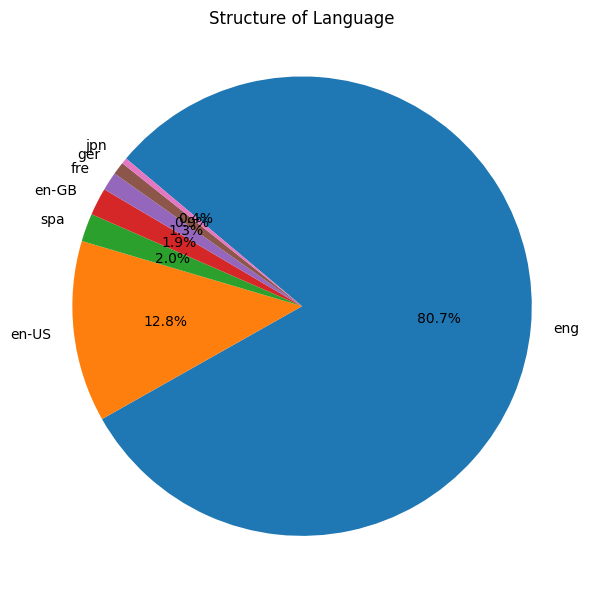

In [102]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(6, 6))
language_counts = df['language_code'].value_counts().head(7)
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False)

# Add a title
plt.title('Structure of Language')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display percentage labels outside the pie
plt.tight_layout()

# Show the plot
plt.show()


**Language_code**
* A huge part of the dataset is composed of english written book. We will regroup en-US,en-GB with eng because it's still english.
We then have 95.4% of the book that are  written in english. 
* Given the high proportion of english books, chances are that it will not bring any useful information during training.


**Title**
* After examining the descriptive statistics table, we can deduce that title has 775 doublons (11123-10348). We will check to see if they need to be deleted
* We also remark that title of books are written in their language code. The inconsistency in title formatting might pose challenges when extracting meaningful information using NLP Techniques tokenization , stemming, or word embeddings :
    - Portuges(por)--> O Cavalo e o Seu Rapaz (As Crónicas de Nárnia)
    - English(eng)  --> Poor People
    - Spanish(spa) --> Las aventuras de Tom Sawyer

* Uniqueness of title might limit the generalization ability of the model due to overfiting. If the model encounters a new title during prediction that wasn't in the training data, it might struggle to make accurate predictions.


In [8]:
df[df.title.duplicated(keep=False)].sort_values(by='title')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1572,5413,'Salem's Lot,Stephen King/Jerry N. Uelsmann,4.25,0385516487,9780385516488,eng,594,84123,571,11/1/2005,Doubleday
9249,36303,'Salem's Lot,Stephen King,4.02,0451139690,9780451139696,eng,427,186,22,8/1/1976,Signet
5298,19135,'Salem's Lot,Stephen King/Ron McLarty,4.02,0743536959,9780743536950,en-US,0,56,5,1/19/2004,Simon & Schuster Audio
1576,5419,'Salem's Lot,Stephen King,4.02,0451092317,9780451092311,en-US,427,178,35,11/13/1979,Signet
1574,5415,'Salem's Lot,Stephen King,4.02,0965772411,9780965772419,eng,405,1039,130,10/17/1975,Doubleday
...,...,...,...,...,...,...,...,...,...,...,...,...
10903,44595,Wide Sargasso Sea,Jean Rhys,3.58,0140818030,9780140818031,en-US,168,878,79,4/26/2001,Penguin Classics
568,1848,Wild Swans: Three Daughters of China,Jung Chang,4.26,0743246985,9780743246989,eng,562,73572,4280,8/12/2003,Simon Schuster
2656,9763,Wild Swans: Three Daughters of China,Jung Chang,4.26,0007176155,9780007176151,eng,666,1832,214,4/5/2004,Harper Perennial
3491,12703,Wuthering Heights,Emily Brontë/Alice Hoffman,3.85,0451529251,9780451529251,eng,322,1898,201,3/2/2004,Signet Classics


We know that isbn13 is an unique identifier of a book. Even though, the title are similar isbn are different, we will not consider them as doublons. also the publisher and the date of publication are different, it could be an update or versionning of the book. In any case, the reader is still going to evaluate that new version of the book and it might bring some useful information during trainig.

**Authors** : 
- From the same descriptive table and when taking into account the hypothesis of versioning of books,  we can say that Stephen King wrote the most books with 40 appearances.

 Also , we have group of authors on certain books and that group of authors is counted as one when computing the uniqueness. So we need to handle that to find who really wrote the most books.

- How can we make the model understand the impact of each authors on the average_notation ? it's challengeing...

    - There is too many unique value so One Hot Encoding will not be possible.
    - Isolating authors (by exploding the columns) will lead to repeated data (except in the split authors columns) which is not great for training 
<br>
- In order to exploit authors column, we are going to add the average notation of authors as a new variable instead of authors name. The goodread website has a json file 'goodreads_book_authors.json' that contains the average notation of authors and we will be using that json file to add information.

In [114]:
# display group of publisher
df[df.publisher.str.contains('/')]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,average_ratings_category
107,181,A Wrinkle in Time: With Related Readings (A Wr...,Madeleine L'Engle,4.00,0821925326,9780821925324,eng,250,36,6,5/1/2002,EMC/Paradigm Publishing,2
114,213,New Hope for the Dead (Hoke Mosely #2),Charles Willeford/James Lee Burke,3.90,1400032490,9781400032495,eng,244,821,78,8/10/2004,Vintage Crime/Black Lizard,2
115,214,Sideswipe: A Hoke Moseley Novel,Charles Willeford/Lawrence Block,4.05,1400032482,9781400032488,eng,215,731,72,3/8/2005,Vintage Crime/Black Lizard,3
116,216,Miami Blues (Hoke Moseley #1),Charles Willeford/Elmore Leonard,3.94,1400032466,9781400032464,eng,191,2897,178,8/10/2004,Vintage Crime/Black Lizard,2
358,1226,Life of Pi,Yann Martel,3.91,0156030209,9780156030205,en-US,401,4318,668,5/3/2004,Mariner Books / Harvest Books,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10629,43370,Thomas Jefferson: Author of America,Christopher Hitchens,3.91,0060598964,9780060598969,eng,188,2319,221,5/31/2005,Atlas Books/HarperCollins Publishers,2
10701,43650,Something Borrowed,Rebecca Hagan Lee,4.14,0786500735,9780786500734,eng,282,38,1,2/1/1995,Diamond/Charter,3
10850,44323,The Rose and the Beast: Fairy Tales Retold,Francesca Lia Block,3.77,0064407454,9780064407458,en-US,240,6872,395,8/7/2001,Joanna Cotler Books/HarperCollinsPublishers,2
10917,44705,The Leadership Challenge: Skills for Taking Ch...,Warren G. Bennis,0.00,088684049X,9780886840495,eng,60,0,0,12/1/1985,AMR/Advanced Management Reports,0


In [10]:
# Display some variation in penguin names
penguin=df[df.publisher.str.contains('penguin',case=False)]
penguin.publisher.value_counts()

Penguin Books                                      261
Penguin Classics                                   184
Penguin                                             58
Penguin Books Ltd                                   30
Penguin Books  Limited (UK)                          5
Penguin UK                                           4
Penguin Press HC  The                                4
Penguin Group (USA)                                  3
Penguin Books Limited                                3
Penguin Group                                        3
Penguin Global                                       2
Arkana/Penguin                                       2
Penguin Books Ltd.                                   2
Penguin (Non-Classics)                               2
Penguin Group(CA)                                    2
Penguin Workshop                                     2
Penguin Books Australia Ltd.                         2
Penguin Audio                                        2
Penguin Pr

In [11]:
# Display of variation in vintage names
vintage=df[df.publisher.str.contains('vintage',case=False)]
vintage.publisher.value_counts()

Vintage                                             318
Vintage Classics                                     23
Vintage International                                18
Vintage Crime/Black Lizard                           15
Vintage Books                                        13
Vintage Books USA                                    10
Vintage Contemporaries                                4
Vintage/Random House (NY)                             3
Vintage Espanol                                       2
Vintage Crime                                         1
Vintage/Ebury (A Division of Random House Group)      1
Random House Vintage Books                            1
Random House Vintage                                  1
Random House (Vintage)                                1
Vintage Books/Vintage Classics                        1
Vintage/Ebury                                         1
Vintage/Random House Inc. (NYC)                       1
Vintage Books a division of Random House        

In [12]:
scholastic=df[df.publisher.str.contains('scholastic',case=False)]
scholastic.publisher.value_counts()

Scholastic Paperbacks                       56
Scholastic                                  33
Scholastic Inc.                             13
Scholastic  Inc.                             9
Scholastic Press                             7
Scholastic Books                             3
Scholastic Audio Books                       2
Scholastic Reference                         1
Arthur A. Levine Books / Scholastic Inc.     1
Apple Paperbacks (Scholastic)                1
Scholastic Inc                               1
Hippo/Scholastic                             1
Chicken House / Scholastic                   1
Scholastic Nonfiction                        1
Name: publisher, dtype: int64

##### Isbn,Isbn3,Publisher
* Publisher columns shared the same issue with Authors columns, There is too much unique value(2290) and isolating the impact of a signle publisher on the average won't be good for training.
* Moreover, names for the same publisher varies which will be an issue for detecting pattern. For examples, 
    - Plume (Penguin Books Ltd),Michael Joseph Ltd./Penguin Books Ltd.,Penguin Books Limited,Penguin Books  Limited (UK) 
    - Random House Vintage,Random House (Vintage),Vintage Books/Vintage Classics 
    - Scholastic,Scholastic Inc.,Scholastic Inc.,Scholastic Inc,Hippo/Scholastic 
<br></br>

So one Hote Encoding is a no go because of the high number of unique value and ordinalEncoding will not truly convey the right information

* Another way to proceed is to use ISBN10 or ISBN13.We could use ISBN or ISBN13 in order to get the digit of the publisher.

For example : From ISBN13 : 978-0-545-01022-1 we can infer that 
"978" is the ISBN-13 prefix, indicating that it's an ISBN for a book.
"0" is the group identifier, representing the country or language area of the publisher.
"545" is the publisher identifier, unique to the publisher.
"01022" is the publication element identifies the specific publication
"7" is the check digit, calculated based on the preceding digits to help detect errors.

* Unfortunately, the publisher identifier and the the publication element(title) can have varying length which makes it difficult to infer with confidence.
In our dataset that information is not explicitly given to us and we can not deduce it with confidence. for example is the publisher identifier is composed of 1, 2, 3 , or 4 digits ? we can't be sure of that.

*For all those reaseon, we are going to drop the publisher columns.



##### Average rating
Average rating is the columns to predict. Using that variable to engineer feature might lead to overfitting during training (we will have good result during training but bad  not as good result during testing). I make the choice not to use it.


##### publication_date
We will separate the month and the year in order to study teir relation with average notation and authors notation



#### NUMERICAL FEATURES EXPLORATION

In [116]:
numerical_columns=['average_rating','num_pages', 'ratings_count', 'text_reviews_count']
df[numerical_columns].describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000
mean,3.934075,336.405556,1.794285e+04,542.048099
std,0.350485,241.152626,1.124992e+05,2576.619589
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,47.000000
75%,4.140000,416.000000,5.000500e+03,238.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


* The average rating ranges from 0 to 5
* We can see two issues with num_pages, the min is equal 0 and the maximum of pages is equal to 6576 (both are not normal for a book)
* ratings_count : We can't have a rating_count of 0 and have an average_rating different from 0. we will verify that and handle it if necessary
* Text_reviews_count: We can infer that, it is less frequent for the readers to leave text_reviews than ratings_count.From the table we can say that 50% of the text_reviews_count are inferior to 47 whereas 50% of rating_counts are inferior to 745. 

In [ ]:
def drop_outliers(df):
    '''Drop all the rows where ratings_counts=0 and average_rating==0'''
    mask=(df.ratings_count==0) | (df.average_rating==0)
    return df[~mask]

In [39]:
df[(df.ratings_count==0) | (df.average_rating==0)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
264,797,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,8408064762,9788408064763,spa,480,0,0,5/1/2006,Geoplaneta
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.00,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.00,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames
525,1658,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,0321317106,9780321317100,eng,664,0,0,3/11/2005,Longman Publishing Group
526,1664,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,0321365208,9780321365200,eng,854,0,0,7/29/2005,Longman Publishing Group
...,...,...,...,...,...,...,...,...,...,...,...,...
10513,42863,Mission Possible,Kenneth H. Blanchard,3.44,0071348271,9780071348270,eng,242,0,0,4/30/1999,McGraw-Hill Companies
10849,44321,A Cargo of Women: Susannah Watson and the Conv...,Babette Smith,3.58,1877058335,9781877058332,eng,264,0,0,6/1/2005,Rosenberg Publishing
10862,44433,Courageous Faith Through the Year,Bill Hybels/Keri Wyatt Kent,3.50,0830832947,9780830832941,eng,327,0,0,7/1/2004,IVP Books
10917,44705,The Leadership Challenge: Skills for Taking Ch...,Warren G. Bennis,0.00,088684049X,9780886840495,eng,60,0,0,12/1/1985,AMR/Advanced Management Reports


In [14]:
# Num_pages Analyse
df.sort_values(by ='num_pages', ascending=False)[:5]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6802,25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,5/9/1986,Mariner Books
10906,44613,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,0701125594,9780701125592,eng,3400,6,1,3/5/1981,Chatto & Windus
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
6822,25709,Summa Theologica 5 Vols,Thomas Aquinas,4.12,0870610635,9780870610639,eng,3020,2734,84,1/1/1981,Christian Classics


* We can deduce via the title columns that those books with a lot of pages are actually collections or volumes. so we will drop them  as our concerns
* is to predict the average_rating of a single book, more over it could include redondancy in our training.

* Loking for outliers

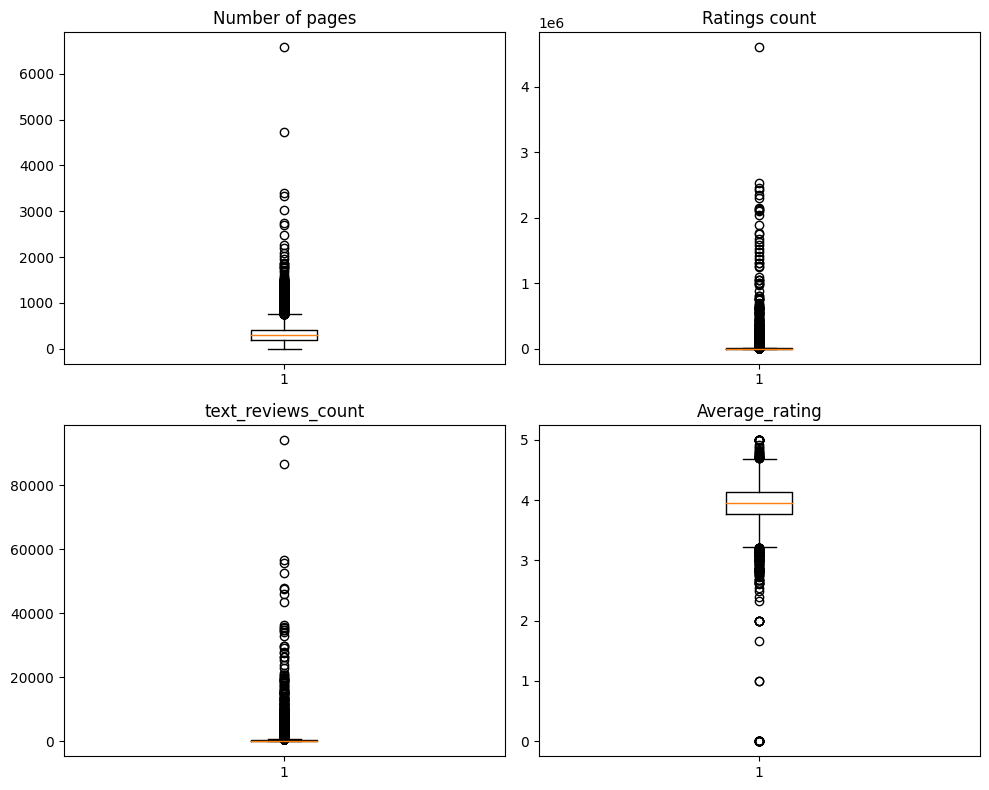

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Générer des données aléatoires pour les quatre boîtes à moustaches
data1 = df.num_pages
data2 = df.ratings_count
data3 = df.text_reviews_count
data4 = df.average_rating

# Créer un sous-ensemble de graphiques avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Créer les boîtes à moustaches pour chaque ensemble de données

axes[0, 0].boxplot(data1)
axes[0, 0].set_title('Number of pages')

axes[0, 1].boxplot(data2)
axes[0, 1].set_title('Ratings count')

axes[1, 0].boxplot(data3)
axes[1, 0].set_title('text_reviews_count')

axes[1, 1].boxplot(data4)
axes[1, 1].set_title('Average_rating')

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


Num_pages: Thee outliers are mainly collections of books so we will drop all the number of pages >1000
Ratings_count : 

##### num_pages, ratings_count, text_reviews_count
We will definitely use those for our model, one things we will verify during analysis is the correlation between those variables. Do books get a better rating when there is huge ratings or/and text reviews or a lot of pages.
We will rename ' num_pages' in  'num_pages'.

In [66]:
#Let's perform a stratify split by average_rating
df['average_ratings_category']=pd.cut(df['average_rating'],bins=[-1,2,3,4,5],labels=['0','1','2','3'])

print(df['average_ratings_category'].value_counts())

#Split the data into train and test.
train, test= train_test_split(df,test_size=0.2,random_state=42,stratify=df['average_ratings_category'])

# Save train and test
train.to_csv('./datasets/train.csv',index=False)
test.to_csv('./datasets/test.csv',index=False)

2    6285
3    4735
1      69
0      34
Name: average_ratings_category, dtype: int64


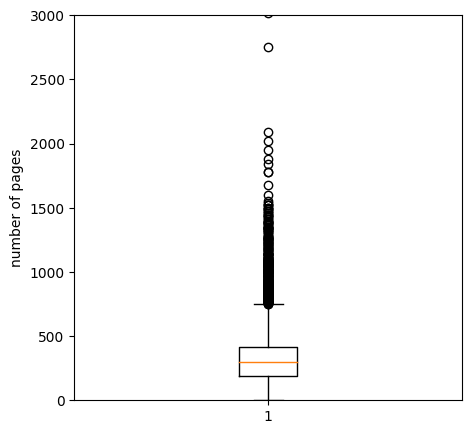

In [17]:
#let's see what a boxplot will tell us about those outliers
plt.figure(figsize=(5,5))
plt.boxplot(train['num_pages'])
plt.ylabel('number of pages')
plt.ylim(0,3000)
plt.show()

* we have a lot of outliers that are mostly collections, novels and boxes. We will keep all books that have pages > 1000

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8898 entries, 9809 to 7830
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   bookID                    8898 non-null   int64   
 1   title                     8898 non-null   object  
 2   authors                   8898 non-null   object  
 3   average_rating            8898 non-null   float64 
 4   isbn                      8898 non-null   object  
 5   isbn13                    8898 non-null   int64   
 6   language_code             8898 non-null   object  
 7   num_pages                 8898 non-null   int64   
 8   ratings_count             8898 non-null   int64   
 9   text_reviews_count        8898 non-null   int64   
 10  publication_date          8898 non-null   object  
 11  publisher                 8898 non-null   object  
 12  average_ratings_category  8898 non-null   category
dtypes: category(1), float64(1), int64(5), object(

##### CLEANING DATA

In [120]:

#Let's write a function that will cload the data and do all the processing --> see books_functions
#train=process_books(train)
process=BooksProcessingTransformer()
authors_notation=AuthorsNotationTransformer()
df=process.transform(df)
df=authors_notation.transform(df)

In [121]:
df.corr()

/var/folders/5q/_mlmv_q11hd3pwylfnll66qr0000gn/T/ipykernel_2136/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,average_ratings_category,year,month,authors_average_notation
bookID,1.000000,-0.033881,-0.002089,-0.011700,-0.076576,-0.080650,-0.035599,0.025785,0.003740,-0.032942
average_rating,-0.033881,1.000000,0.001822,0.111591,0.041802,0.035889,0.786486,-0.040296,0.025700,0.636850
isbn13,-0.002089,0.001822,1.000000,0.009313,0.006999,0.008989,0.005403,0.000263,-0.006703,-0.012424
num_pages,-0.011700,0.111591,0.009313,1.000000,0.045416,0.052072,0.098259,-0.003484,0.015409,0.035312
ratings_count,-0.076576,0.041802,0.006999,0.045416,1.000000,0.865392,0.032455,0.044690,-0.015320,0.040908
text_reviews_count,-0.080650,0.035889,0.008989,0.052072,0.865392,1.000000,0.032233,0.067282,-0.024879,0.034816
average_ratings_category,-0.035599,0.786486,0.005403,0.098259,0.032455,0.032233,1.000000,-0.039973,0.014701,0.545244
year,0.025785,-0.040296,0.000263,-0.003484,0.044690,0.067282,-0.039973,1.000000,0.021122,-0.038612
month,0.003740,0.025700,-0.006703,0.015409,-0.015320,-0.024879,0.014701,0.021122,1.000000,0.036590
authors_average_notation,-0.032942,0.636850,-0.012424,0.035312,0.040908,0.034816,0.545244,-0.038612,0.036590,1.000000


* Now that the dataset is clean let's do the data analysis

#### DATA ANALYSIS

Question we want to answers thanks to the data.

Statistical Analysis
* Study the distribution of features 
* Analysing correlation between features and average_rating 

Data Analysis
* Which authors wrote the most books ?
* Who are the top 10 highly rated and the bottom 5 poorly rated authors?
* Did the books with more text reviews or rating count receive higher ratings ?
* Did the authors with good notation receive higher ratings for their books?
* How are books distributed across different languages ?

* Study the distribution of features 

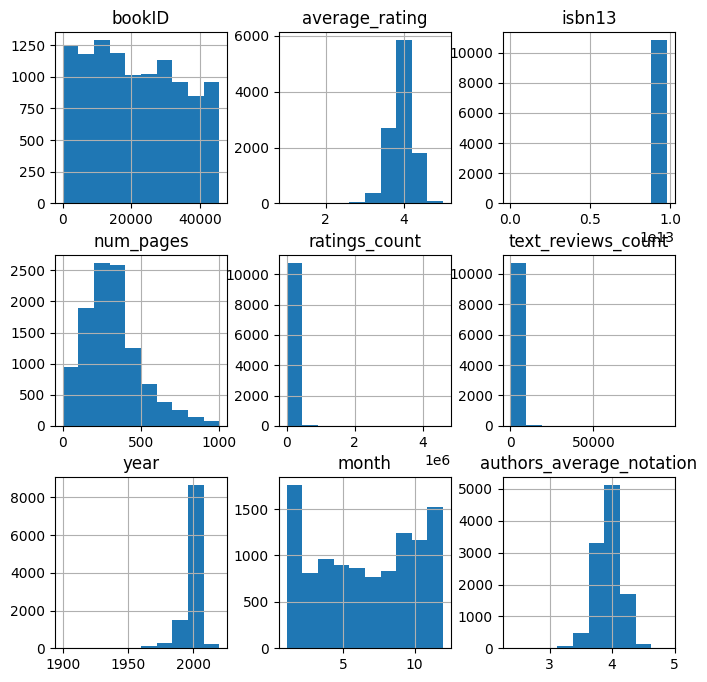

In [20]:
df.hist(figsize=(8,8))
plt.show()

From the different distribution we can say that : 
* Average ratings is normally distributed
* ratigns_count, the text_reviews_count and num_pages are left skew

* Analysing correlation between features and average_rating 
* Did the books with more text reviews or rating count receive higher ratings ?
* Did the authors with good notation receive higher ratings for their books?

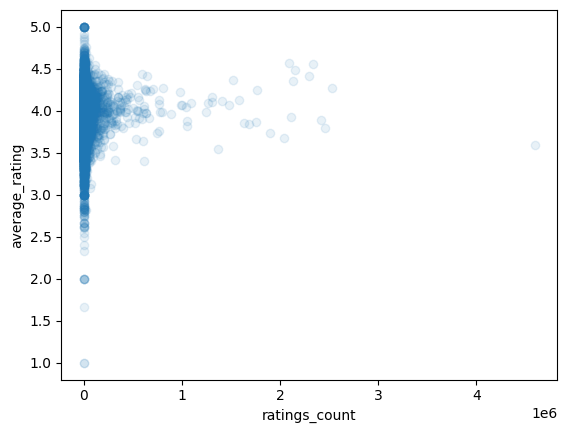

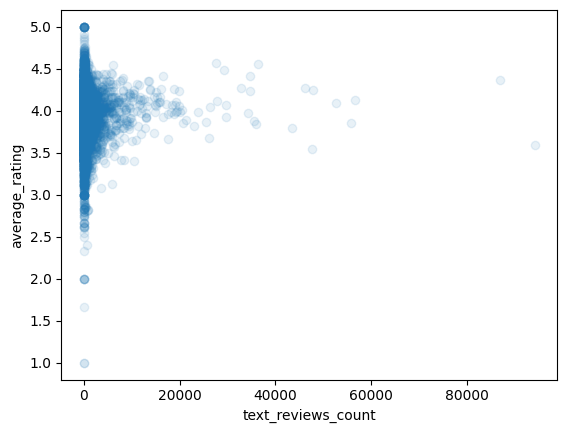

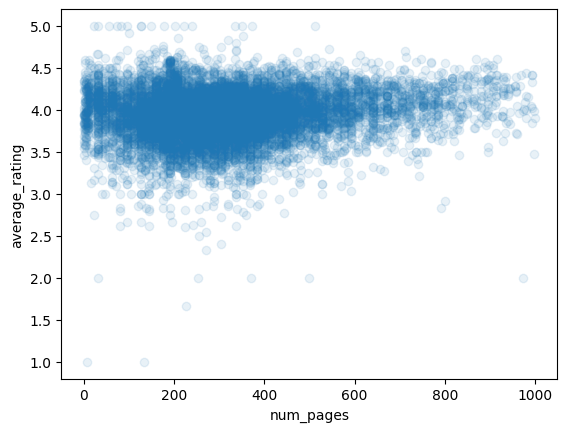

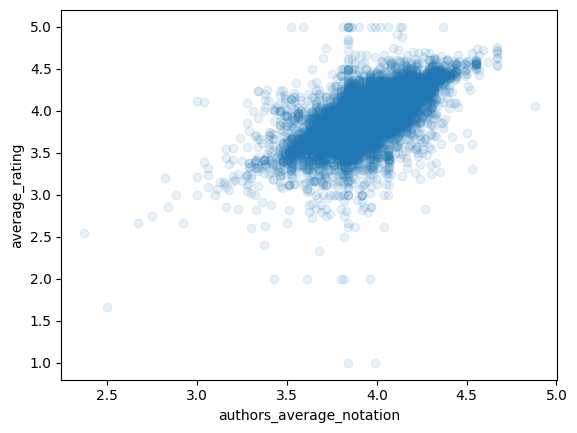

In [21]:
attributes = ["ratings_count", "text_reviews_count","num_pages",'authors_average_notation']
for x in attributes:
    plt.scatter(df[x],df.average_rating,alpha=0.1)  #Alpha allows us to know where there is concentration of point in the graph
    # Rotation des étiquettes
# Ajouter des titres et des étiquettes d'axe
    plt.xlabel(x)
    plt.ylabel('average_rating')
    #plt.title('Top 10 of authors with the most wwritten book')

    # Afficher le diagramme
    plt.show()


* The correlation of ratings_count, text_reviews, num_pages with average ratings is very weak. In the other hand, we observe a net correlation between average_rating and average_notation.

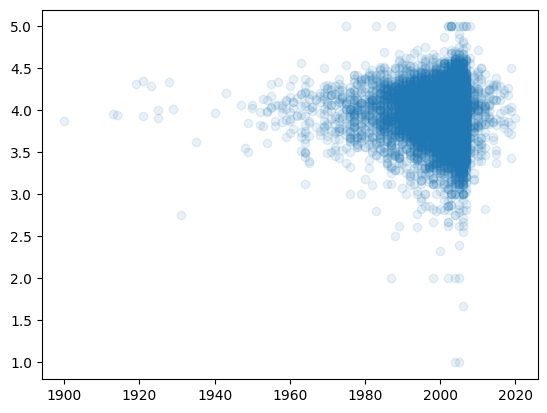

In [22]:
plt.scatter(df.year,df.average_rating,alpha=0.1)

/var/folders/5q/_mlmv_q11hd3pwylfnll66qr0000gn/T/ipykernel_2136/1161281834.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="viridis", annot=True)


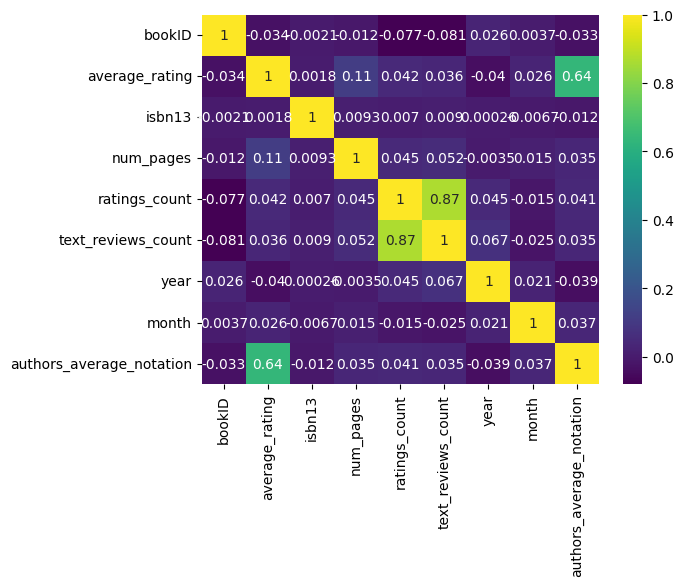

In [23]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="viridis", annot=True)
plt.show()

* We can see from the two first graph that the correlation between ratings_count, text_reviews count with average_ratings is weak. there is a concentration of point around 0. We also see from the correlation table that ratings_count and text_reviews are well correlated around 86%. we can create a feature with those two in order to get a new feature that might be better correlated with average_rating.

* The correlation of average ratings with number of pages is not great either , we can hardly affirm that when the number of pages inscreases the rating is better. we also have a concentration of point around 100-500 pages

* The authors average notation show a clear correlation with average_rating (the linear relation is evaluated at 62%). we can also notice a strong concentation of point between 3.5 and 4.5. 

The common point of those figures is the concentration of points between certain values. 
Performing a regression analysis on this data can be challenging belcause the model might struggle to capture meaningful patterns. we will transform this regression problem into a classification which might gave us better results. we will be usign the average_ratings_category for the classification.

##### Let's Features Engenieer

In [122]:
# First --> Creation of (1-atio of text_reviews_count over ratings_count)
# trc--> text_reviews_count
# rc---> ratings_count,
# rwtr --> ratings witouth text reviews
#nrorc---> net_ratio_of_ratings_count
#  -->ratio of the number of ratings without text over the number of ratings with text
# In the dataset, rc=trc+rwtr
# First --> Creation of (1-ratio of text_reviews_count over ratings_count)
#net_ratio_of_ratings_count=(1-trc/rc)=(rc-trc)/rc=rwtr/rc
#Interpretation
# if we have a net_ratio_of_ratings_count=0.7 ==> pour un rc total de 100, nous avons 70 ratings qui ont étét laissé sans reviews text
# -->ratio of the number of ratings without text over the number of ratings with text
#trc/rc
# Second --> 
feature_eng=AuthorsFeaturesTransformer()
df=feature_eng.transform(df)

In [123]:
df.corr()

/var/folders/5q/_mlmv_q11hd3pwylfnll66qr0000gn/T/ipykernel_2136/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,average_ratings_category,year,month,authors_average_notation,ratio_of_text_reviews
bookID,1.000000,-0.033881,-0.002089,-0.011700,-0.076576,-0.080650,-0.035599,0.025785,0.003740,-0.032942,0.003290
average_rating,-0.033881,1.000000,0.001822,0.111591,0.041802,0.035889,0.786486,-0.040296,0.025700,0.636850,-0.153614
isbn13,-0.002089,0.001822,1.000000,0.009313,0.006999,0.008989,0.005403,0.000263,-0.006703,-0.012424,-0.004526
num_pages,-0.011700,0.111591,0.009313,1.000000,0.045416,0.052072,0.098259,-0.003484,0.015409,0.035312,-0.101978
ratings_count,-0.076576,0.041802,0.006999,0.045416,1.000000,0.865392,0.032455,0.044690,-0.015320,0.040908,-0.119395
text_reviews_count,-0.080650,0.035889,0.008989,0.052072,0.865392,1.000000,0.032233,0.067282,-0.024879,0.034816,-0.101328
average_ratings_category,-0.035599,0.786486,0.005403,0.098259,0.032455,0.032233,1.000000,-0.039973,0.014701,0.545244,-0.113503
year,0.025785,-0.040296,0.000263,-0.003484,0.044690,0.067282,-0.039973,1.000000,0.021122,-0.038612,0.026838
month,0.003740,0.025700,-0.006703,0.015409,-0.015320,-0.024879,0.014701,0.021122,1.000000,0.036590,-0.009418
authors_average_notation,-0.032942,0.636850,-0.012424,0.035312,0.040908,0.034816,0.545244,-0.038612,0.036590,1.000000,-0.155105


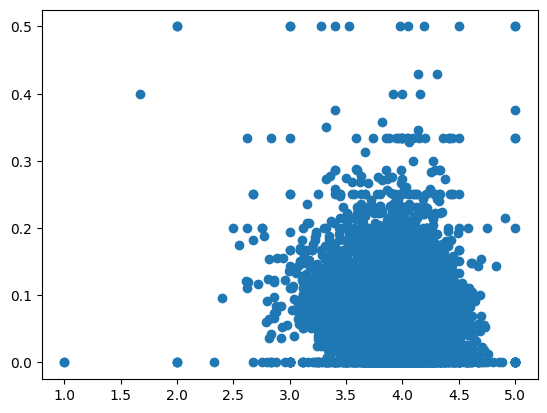

In [27]:
plt.scatter(df.average_rating,df.net_ratio_of_ratings_count)
plt.show()

In [139]:
train.corr()

/var/folders/5q/_mlmv_q11hd3pwylfnll66qr0000gn/T/ipykernel_73731/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,year,month,authors_average_notation,rate_ratings,rate_ratings_authors
bookID,1.000000,-0.020808,0.005606,0.001115,-0.063873,-0.071539,0.023282,0.003994,-0.024468,-0.004762,-0.015098
average_rating,-0.020808,1.000000,0.002995,0.098645,0.032696,0.027505,-0.044939,0.030361,0.637398,0.148089,0.441812
isbn13,0.005606,0.002995,1.000000,0.023458,0.006692,0.008758,0.002566,-0.003838,-0.016669,0.006932,-0.003132
num_pages,0.001115,0.098645,0.023458,1.000000,0.039468,0.048794,-0.002175,0.014070,0.020707,0.095164,0.084742
ratings_count,-0.063873,0.032696,0.006692,0.039468,1.000000,0.866476,0.044592,-0.008199,0.028677,0.092312,0.088156
text_reviews_count,-0.071539,0.027505,0.008758,0.048794,0.866476,1.000000,0.066464,-0.014160,0.027010,0.079534,0.076840
year,0.023282,-0.044939,0.002566,-0.002175,0.044592,0.066464,1.000000,0.037096,-0.041674,-0.020994,-0.037309
month,0.003994,0.030361,-0.003838,0.014070,-0.008199,-0.014160,0.037096,1.000000,0.031848,0.017176,0.030792
authors_average_notation,-0.024468,0.637398,-0.016669,0.020707,0.028677,0.027010,-0.041674,0.031848,1.000000,0.152537,0.633168
rate_ratings,-0.004762,0.148089,0.006932,0.095164,0.092312,0.079534,-0.020994,0.017176,0.152537,1.000000,0.859322


* Thenew feature ingeneer is equal to (1-text-reviews/ratings_count*authors_notation

In [140]:
train.corr()

/var/folders/5q/_mlmv_q11hd3pwylfnll66qr0000gn/T/ipykernel_73731/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,year,month,authors_average_notation,rate_ratings,rate_ratings_authors
bookID,1.000000,-0.020808,0.005606,0.001115,-0.063873,-0.071539,0.023282,0.003994,-0.024468,-0.004762,-0.015098
average_rating,-0.020808,1.000000,0.002995,0.098645,0.032696,0.027505,-0.044939,0.030361,0.637398,0.148089,0.441812
isbn13,0.005606,0.002995,1.000000,0.023458,0.006692,0.008758,0.002566,-0.003838,-0.016669,0.006932,-0.003132
num_pages,0.001115,0.098645,0.023458,1.000000,0.039468,0.048794,-0.002175,0.014070,0.020707,0.095164,0.084742
ratings_count,-0.063873,0.032696,0.006692,0.039468,1.000000,0.866476,0.044592,-0.008199,0.028677,0.092312,0.088156
text_reviews_count,-0.071539,0.027505,0.008758,0.048794,0.866476,1.000000,0.066464,-0.014160,0.027010,0.079534,0.076840
year,0.023282,-0.044939,0.002566,-0.002175,0.044592,0.066464,1.000000,0.037096,-0.041674,-0.020994,-0.037309
month,0.003994,0.030361,-0.003838,0.014070,-0.008199,-0.014160,0.037096,1.000000,0.031848,0.017176,0.030792
authors_average_notation,-0.024468,0.637398,-0.016669,0.020707,0.028677,0.027010,-0.041674,0.031848,1.000000,0.152537,0.633168
rate_ratings,-0.004762,0.148089,0.006932,0.095164,0.092312,0.079534,-0.020994,0.017176,0.152537,1.000000,0.859322


In [65]:
df.average_ratings_category=pd.to_numeric(train.average_ratings_category)
df.corr()

/var/folders/5q/_mlmv_q11hd3pwylfnll66qr0000gn/T/ipykernel_98364/108201732.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bookID,authors,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publisher,average_ratings_category,year,month,authors_average_notation,ratio_of_text_reviews,rate_ratings,cluster
bookID,1.000000,-0.004108,-0.033881,-0.002089,-0.011700,-0.076576,-0.080650,-0.037749,-0.023714,0.025785,0.003740,-0.032942,-0.003290,-0.006319,-0.071261
authors,-0.004108,1.000000,0.012701,-0.028155,-0.001999,0.002904,-0.005480,0.037521,0.005843,-0.004885,-0.002244,0.036208,0.012338,0.012131,0.003889
average_rating,-0.033881,0.012701,1.000000,0.001822,0.111591,0.041802,0.035889,0.025642,0.787897,-0.040296,0.025700,0.636850,0.153614,0.141061,0.038193
isbn13,-0.002089,-0.028155,0.001822,1.000000,0.009313,0.006999,0.008989,0.017873,0.006403,0.000263,-0.006703,-0.012424,0.004526,0.003598,0.005328
num_pages,-0.011700,-0.001999,0.111591,0.009313,1.000000,0.045416,0.052072,0.011965,0.087052,-0.003484,0.015409,0.035312,0.101978,0.100728,0.024485
ratings_count,-0.076576,0.002904,0.041802,0.006999,0.045416,1.000000,0.865392,-0.005415,0.030921,0.044690,-0.015320,0.040908,0.119395,0.103717,0.576138
text_reviews_count,-0.080650,-0.005480,0.035889,0.008989,0.052072,0.865392,1.000000,-0.006989,0.031596,0.067282,-0.024879,0.034816,0.101328,0.091673,0.576410
publisher,-0.037749,0.037521,0.025642,0.017873,0.011965,-0.005415,-0.006989,1.000000,0.016330,-0.015584,-0.013936,0.023677,0.018598,0.023125,-0.003828
average_ratings_category,-0.023714,0.005843,0.787897,0.006403,0.087052,0.030921,0.031596,0.016330,1.000000,-0.038228,0.020491,0.550104,0.113679,0.104992,0.031792
year,0.025785,-0.004885,-0.040296,0.000263,-0.003484,0.044690,0.067282,-0.015584,-0.038228,1.000000,0.021122,-0.038612,-0.026838,-0.022437,0.034847


* Which authors wrote the most books ?

In [315]:
def get_sum_books(df):
    authors = df.copy()
    authors['authors'] = authors['authors'].astype(str)
    authors['authors'] = authors['authors'].apply(lambda x: x)
    authors['authors_split'] = authors['authors'].apply(lambda x: x.split('/'))
    authors = authors.explode('authors_split')

    most_books_written = authors.groupby('authors_split')['title'].count().sort_values(ascending=False)
    most_books_written = most_books_written.rename('nb_written_book').reset_index()
    
    return most_books_written,authors

In [316]:
# Get the number of books written by group of authors
classement,authors=get_sum_books(train)


In [317]:
authors

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,average_ratings_category,year,month,authors_split,authors_average_notation,rate_ratings,rate_ratings_authors
9809,39361,Paws Before Dying (A Dog Lover's Mystery #4),Susan Conant,3.90,0425144305,9780425144305,eng,197.0,427,20,1/1/1960,Berkley Books,2,1960,1,Susan Conant,3.76,0.953162,3.583888
7605,29251,Still Here: Embracing Aging Changing and Dying,Ram Dass/Richard Alpert,4.11,1573228710,9781573228718,eng,224.0,861,81,6/1/2001,Riverhead Books,3,2001,6,Ram Dass,4.26,0.905923,3.859233
7605,29251,Still Here: Embracing Aging Changing and Dying,Ram Dass/Richard Alpert,4.11,1573228710,9781573228718,eng,224.0,861,81,6/1/2001,Riverhead Books,3,2001,6,Richard Alpert,4.26,0.905923,3.859233
2546,9370,Skinny Legs and All,Tom Robbins,4.04,1842430343,9781842430347,eng,422.0,35517,1014,3/10/2002,No Exit Press,3,2002,3,Tom Robbins,3.96,0.971450,3.846943
2774,10235,Mountains Beyond Mountains: The Quest of Dr. P...,Tracy Kidder,4.21,0812973011,9780812973013,eng,333.0,63813,4347,8/31/2004,Random House Trade,3,2004,8,Tracy Kidder,4.13,0.931879,3.848661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,4746,Master Index: An Illustrated Guide,Time-Life Books,3.56,0809447967,9780809447961,eng,175.0,16,1,9/1/1993,Time-Life Books Inc.,2,1993,9,Time-Life Books,3.89,0.937500,3.646875
2438,8880,Planet of the Apes Volume 1: Old Gods,Ian Edginton,2.62,1569716684,9781569716687,eng,80.0,8,2,3/5/2002,Dark Horse Comics,1,2002,3,Ian Edginton,4.04,0.750000,3.030000
5710,21320,Ultimate Spider-Man Volume 16: Deadpool,Brian Michael Bendis/Mark Bagley,3.70,0785119272,9780785119272,eng,184.0,1474,58,9/13/2006,Marvel,2,2006,9,Brian Michael Bendis,3.90,0.960651,3.746540
5710,21320,Ultimate Spider-Man Volume 16: Deadpool,Brian Michael Bendis/Mark Bagley,3.70,0785119272,9780785119272,eng,184.0,1474,58,9/13/2006,Marvel,2,2006,9,Mark Bagley,3.90,0.960651,3.746540


In [125]:
classement

NameError: name 'classement' is not defined

In [144]:
#Analyse : 
# it will be interesting to capture the effect of each authors on the average-rating of the book. for example if we want to determine the number of book
#written by the pair J.K. Rowling/Mary GrandPre that will be interesting to add their respective number like 25+6=31.
#same if we can determine the average_authors_notation

* Who are the top 10 highly rated and the bottom 5 poorly rated authors?

In [318]:
import matplotlib.pyplot as plt
def plot_bar(classement,nb,head_or_tail):
  if head_or_tail=='head':
    classement=classement.sort_values(by='nb_written_book',ascending=False)
    # Tracer le diagramme à barres
    plt.bar(classement.authors_split[0:nb], classement.nb_written_book[0:nb])

    # Rotation des étiquettes
    plt.xticks(rotation='vertical')

    # Ajouter des titres et des étiquettes d'axe
    plt.xlabel('Authors')
    plt.ylabel('number of written books')
    plt.title('Top 10 of authors with the most wwritten book')

    # Afficher le diagramme
    plt.show()
  else :
    classement=classement.sort_values(by='nb_written_book',ascending=True)
    plt.bar(classement.authors_split[0:nb], classement.nb_written_book[0:nb])

    # Rotation des étiquettes
    plt.xticks(rotation='vertical')

    # Ajouter des titres et des étiquettes d'axe
    plt.xlabel('Authors')
    plt.ylabel('number of written books')
    plt.title('Top 10 of authors with the most wwritten book')

    # Afficher le diagramme
    plt.show()


In [136]:
plot_bar(classement,15,head_or_tail='head')

NameError: name 'plot_bar' is not defined

In [137]:
plot_bar(classement,15,head_or_tail='tail')

NameError: name 'plot_bar' is not defined

* Who are the top 10 highly rated and the bottom 5 poorly rated authors?


In [148]:
train.sort_values(by='average_rating',ascending=False)
train.sort_values(by='average_rating',ascending=False)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,average_ratings_category,year,month,authors_split,authors_average_notation,rate_ratings,rate_ratings_authors
4788,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.00,1890995525,9781890995522,eng,74.0,5,3,2/1/2006,Square One Publishers,3,2006,2,[John Diamond],4.13,0.400000,1.652000
6184,23276,Taxation of Mineral Rents,Ross Garnaut,5.00,0198284543,9780198284543,eng,350.0,1,0,11/17/1983,Oxford University Press USA,3,1983,11,[Ross Garnaut],3.85,1.000000,3.850000
6247,23552,The New Big Book of America,Todd Davis/Marc Frey,5.00,0762412631,9780762412631,eng,56.0,2,1,3/21/2002,Courage Books,3,2002,3,"[Todd Davis, Marc Frey]",3.90,0.500000,1.950000
5023,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.00,0851621813,9780851621814,eng,96.0,1,0,6/1/2004,Boosey & Hawkes Inc,3,2004,6,"[Ian Martin, Katie Elliott]",3.84,1.000000,3.840000
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.00,0533017424,9780533017423,eng,202.0,4,0,1/1/1975,Vantage Press,3,1975,1,[Elena N. Mahlow],3.84,1.000000,3.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,25780,The Two Tocquevilles Father and Son,R.R. Palmer,2.00,0691054959,9780691054957,eng,254.0,1,0,4/1/1987,Princeton University Press,0,1987,4,[R.R. Palmer],3.96,1.000000,3.960000
5537,20157,McDougal Littell Science: Student Edition Grad...,McDougal Littell/Douglas W. Carnine,2.00,0618615385,9780618615384,eng,972.0,3,0,4/12/2005,McDougal Littel,0,2005,4,"[McDougal Littell, Douglas W. Carnine]",3.80,1.000000,3.800000
8109,31166,The Earth and Its Peoples: A Global History V...,Richard W. Bulliet/Pamela Kyle Crossley/Steven...,2.00,0618427694,9780618427697,eng,370.0,1,1,2/9/2004,Cengage Learning,0,2004,2,"[Richard W. Bulliet, Pamela Kyle Crossley, Ste...",3.43,0.000000,0.000000
7998,30651,The Art of Loving by Erich Fromm: A True Story...,Lala Okamoto,1.67,4990327500,9784990327507,eng,227.0,3,2,10/31/2006,Intercultural Publishing,0,2006,10,[Lala Okamoto],2.50,0.333333,0.833333
